In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [3]:
# Load data files
path = "group3_resources/SpotifyFeatures.csv"


# Read the data 
spotify_df = pd.read_csv(path)

#Visualizing data
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
#Dropping some columns that are not relevant for our objective
spotify_df1=spotify_df.drop(columns=['acousticness','duration_ms','instrumentalness',
                                     'key','liveness','mode','speechiness','time_signature'])
spotify_df1

,genre,artist_name,track_name,track_id,popularity,danceability,energy,loudness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.389,0.910,-1.828,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.590,0.737,-5.559,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.663,0.131,-13.879,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.240,0.326,-12.178,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.331,0.225,-21.150,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.687,0.714,-10.626,115.542,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.785,0.683,-6.944,113.830,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.517,0.419,-8.282,84.135,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.745,0.704,-7.137,100.031,0.489


In [5]:
count_track_name=spotify_df1["track_name"].value_counts()
count_track_name

Home                                                         100
You                                                           71
Intro                                                         69
Stay                                                          63
Wake Up                                                       59
                                                            ... 
Jump the Gun                                                   1
Boricuas Ny                                                    1
The Four Seasons - Spring in E Major, RV. 269: I. Allegro      1
I've Got It All                                                1
Hitler                                                         1
Name: track_name, Length: 148615, dtype: int64

In [6]:
#counting tracks
count_tracks=spotify_df1["track_id"].value_counts()
count_tracks


3R73Y7X53MIQZWnKloWq5i    8
0UE0RhnRaEYsiYgXpyLoZc    8
0wY9rA9fJkuESyYm9uzVK5    8
6AIte2Iej1QKlaofpjCzW1    8
3uSSjnDMmoyERaAK9KvpJR    8
                         ..
7AnnVM4oKQQTzPmO6zT372    1
0mHyWYXmmCB9iQyK18m3FQ    1
38lotTmzecfzVc50ZwLkfB    1
7djURPDp051cljWov6NyPy    1
5I6lDmNu4vioab03GWNAFz    1
Name: track_id, Length: 176774, dtype: int64

In [7]:
#counting artist
count_artist=spotify_df1["artist_name"].value_counts()
count_artist

Giuseppe Verdi                        1394
Giacomo Puccini                       1137
Kimbo Children's Music                 971
Nobuo Uematsu                          825
Richard Wagner                         804
                                      ... 
Adam Hunter                              1
O'Donel Levy                             1
Totally Enormous Extinct Dinosaurs       1
Jason Eady                               1
mor ve ötesi                             1
Name: artist_name, Length: 14564, dtype: int64

In [8]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df1.set_index('track_id')
track=data_tracks.loc['6sVQNUvcVFTXvlk3ec0ngd']
track

,genre,artist_name,track_name,popularity,danceability,energy,loudness,tempo,valence
track_id,,,,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,Alternative,Cocteau Twins,Cherry-coloured Funk,57,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Dance,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Electronic,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Folk,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Children’s Music,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Indie,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,Rock,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365
6sVQNUvcVFTXvlk3ec0ngd,World,Cocteau Twins,Cherry-coloured Funk,61,0.377,0.65,-5.902,180.074,0.365


In [9]:
#Grouping by track id and take the max for each track popularity
genres_group=pd.DataFrame(spotify_df.groupby(['track_id'])['popularity'].max())
genres_group=genres_group.reset_index()
genres_group

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,13
1,000CzNKC8PEt1yC3L8dqwV,5
2,000DfZJww8KiixTKuk9usJ,30
3,000EWWBkYaREzsBplYjUag,39
4,000xQL6tZNLJzIrtIgxqSl,70
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,38
176770,7zzFNNxVD0h0ctAT08H0pa,40
176771,7zzTeItz93lYI52hlcipm5,28
176772,7zzZmpw8L66ZPjH1M6qmOs,67


In [40]:
#Dropping duplicates, keeping just one of the duplicates, removing 2 columns
drop_duplicates=spotify_df1.drop_duplicates(subset=['track_id']).drop(columns=['popularity'])
drop_duplicates

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,-5.559,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,-13.879,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,-12.178,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,-21.150,140.576,0.390
...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,-4.345,99.991,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,-9.014,175.666,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,-13.092,80.023,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,-6.944,113.830,0.969


In [41]:
#merging the popularity mean to the free duplicate data and getting rid of comedy genre
clean_df=pd.merge(drop_duplicates,genres_group,how='left',on='track_id')
clean_df=clean_df[clean_df.genre !='Comedy']
clean_df

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,-5.559,174.003,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,-13.879,99.488,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,-12.178,171.758,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,-21.150,140.576,0.390,4
...,...,...,...,...,...,...,...,...,...,...
176769,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,-4.345,99.991,0.770,39
176770,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,-9.014,175.666,0.482,43
176771,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,-13.092,80.023,0.497,32
176772,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,-6.944,113.830,0.969,38


In [42]:
correlation_df=clean_df.corr()
correlation_df

,danceability,energy,loudness,tempo,valence,popularity
danceability,1.000000,0.380948,0.473695,0.052006,0.593916,0.233076
energy,0.380948,1.000000,0.841702,0.272521,0.483763,0.267489
loudness,0.473695,0.841702,1.000000,0.249271,0.437901,0.322259
tempo,0.052006,0.272521,0.249271,1.000000,0.161243,0.055758
valence,0.593916,0.483763,0.437901,0.161243,1.000000,0.045729
popularity,0.233076,0.267489,0.322259,0.055758,0.045729,1.000000


In [44]:
#Group by popularity  to sort out more
genres_popularity=pd.DataFrame(clean_df.groupby(['genre'])['popularity'].count())
genres_popularity_count=genres_popularity.rename(columns={'popularity':'Count of Tracks',
                                                          'genre':"Genre"})
genres_popularity_count=genres_popularity_count.sort_values("Count of Tracks", ascending=False)
genres_popularity_count

,Count of Tracks
genre,
Electronic,9149
Alternative,9095
Anime,8935
Classical,8711
Reggae,8687
Reggaeton,8549
Blues,8496
Soundtrack,8480
Opera,8280


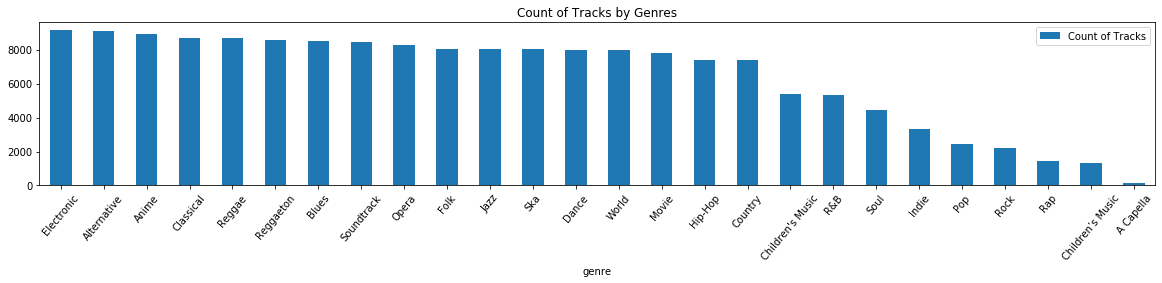

<Figure size 432x288 with 0 Axes>

In [45]:
# Use DataFrame.plot() in order to create a bar chart of the data
genres_popularity_count.plot(kind="bar",rot=50, figsize=(20,3))

# Set a title for the chart
plt.title("Count of Tracks by Genres")
plt.savefig("Images/Bar Chart 1.png")
plt.show()
plt.tight_layout()

In [55]:
#Calculating and listing average for music parameters for each genre
genre_df = clean_df.groupby(['genre'])
max_score = pd.DataFrame(round(genre_df.max(),2))   
max_score1 = mean_score.loc[:,['popularity','danceability','energy','tempo','loudness','valence']]



max_score1.rename(columns={'genre':'Genre',
                       'popularity':'Popularity',
                      'danceability': 'Danceability',
                      'energy':'Energy',
                       'tempo':'Tempo',
                       'loudness':'Loudness',
                       'valence':'Valence'
                     }, inplace=True)
max_score1=max_score1.reset_index()
max_score1

,genre,Popularity,Danceability,Energy,Tempo,Loudness,Valence
0,A Capella,44,0.78,0.82,181.71,-3.56,0.97
1,Alternative,86,0.97,1.00,213.79,1.34,0.98
2,Anime,76,0.92,1.00,220.28,1.89,1.00
3,Blues,82,0.98,1.00,242.90,3.74,0.98
4,Children's Music,51,0.99,1.00,220.12,0.95,1.00
5,Children’s Music,87,0.90,0.99,208.53,-0.87,0.97
6,Classical,70,0.83,1.00,212.92,-1.79,0.98
7,Country,82,0.95,0.99,217.54,-0.52,0.98
8,Dance,100,0.97,1.00,218.08,0.13,0.99
9,Electronic,85,0.99,1.00,220.17,1.58,0.99


In [57]:
#Sorting top 5 popular genres based on popularity
top_5 = max_score1.sort_values("Popularity", ascending=False)
top_5=top_5.set_index('genre')
top_5.head(5)

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
genre,,,,,,
Dance,100,0.97,1.00,218.08,0.13,0.99
Rap,99,0.97,0.98,216.12,-0.82,0.96
Hip-Hop,98,0.99,1.00,214.13,1.01,0.98
Pop,97,0.96,0.99,208.95,0.63,0.98
Reggaeton,96,0.97,0.99,234.92,0.07,0.98


In [58]:
#Sorting bottom 5 popular genres based on popularity
worst_5 = max_score1.sort_values("Popularity", ascending=True)
worst_5=worst_5.set_index('genre')
worst_5.head(5)

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
genre,,,,,,
A Capella,44,0.78,0.82,181.71,-3.56,0.97
Children's Music,51,0.99,1.00,220.12,0.95,1.00
Opera,63,0.69,0.70,236.74,-3.58,0.97
Ska,66,0.98,1.00,221.58,1.10,0.99
Classical,70,0.83,1.00,212.92,-1.79,0.98


In [59]:
popularity_bins=max_score1.copy()
#Creating popularity bins

size_bins = [0, 40, 60, 80,90,100]

# Create labels for these bins
size_labels = ["Not Popular (< 40)", "A Little Popular (40-60)", "Likable But Not Popular (60-80)","Popular (80-90)","Most Popular (90-100)"]
popularity_bins["Popularity Size"]=pd.cut(mean_score1["Aver. Popularity"], size_bins, labels=size_labels)
popularity_bins

,genre,Popularity,Danceability,Energy,Tempo,Loudness,Valence,Popularity Size
0,A Capella,44,0.78,0.82,181.71,-3.56,0.97,A Little Popular (40-60)
1,Alternative,86,0.97,1.00,213.79,1.34,0.98,Popular (80-90)
2,Anime,76,0.92,1.00,220.28,1.89,1.00,Likable But Not Popular (60-80)
3,Blues,82,0.98,1.00,242.90,3.74,0.98,Popular (80-90)
4,Children's Music,51,0.99,1.00,220.12,0.95,1.00,A Little Popular (40-60)
5,Children’s Music,87,0.90,0.99,208.53,-0.87,0.97,Popular (80-90)
6,Classical,70,0.83,1.00,212.92,-1.79,0.98,Likable But Not Popular (60-80)
7,Country,82,0.95,0.99,217.54,-0.52,0.98,Popular (80-90)
8,Dance,100,0.97,1.00,218.08,0.13,0.99,Most Popular (90-100)
9,Electronic,85,0.99,1.00,220.17,1.58,0.99,Popular (80-90)


In [60]:
#Visualizing data in bins
summary_by_popularity_size=popularity_bins.groupby(by="Popularity Size").mean()

summary_by_popularity_size

,Popularity,Danceability,Energy,Tempo,Loudness,Valence
Popularity Size,,,,,,
Not Popular (< 40),NaN,NaN,NaN,NaN,NaN,NaN
A Little Popular (40-60),47.500000,0.885000,0.910000,200.915000,-1.305,0.985000
Likable But Not Popular (60-80),73.333333,0.896667,0.957778,221.521111,-1.060,0.981111
Popular (80-90),84.700000,0.948000,0.996000,221.640000,0.057,0.983000
Most Popular (90-100),98.000000,0.972000,0.992000,218.440000,0.204,0.978000


In [24]:
# Visualize a data with popularity above 90 points
top_songs=spotify_df.loc[spotify_df['popularity'] >90]
top_songs

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533
9029,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,171573,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,4/4,0.195
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138922,Reggaeton,Anuel Aa,Amanece,1LiN0Z98FkR1t0m8KmLcAH,92,0.4370,0.790,190005,0.631,0.000000,G#,0.1580,-5.549,Minor,0.0425,94.039,4/4,0.889
138931,Reggaeton,Daddy Yankee,Adictiva,6MJUCumnQsQEKbCy28tbCP,91,0.2910,0.788,207853,0.771,0.000056,E,0.1720,-3.206,Minor,0.0563,99.038,4/4,0.701
152266,R&B,Ellie Goulding,Close To Me (with Diplo) (feat. Swae Lee),5JEx7HbmvHQQswJCsoo9rA,92,0.0969,0.574,182623,0.758,0.000000,C#,0.3950,-5.029,Minor,0.0621,144.111,4/4,0.492
152287,R&B,Mabel,Don't Call Me Up,5WHTFyqSii0lmT9R21abT8,91,0.2960,0.674,178480,0.881,0.000003,A,0.0793,-2.853,Major,0.1470,98.994,4/4,0.234


In [37]:
# Visualize a data with popularity less than 20 points
least_songs=clean_df.loc[clean_df['popularity'] < 20]
least_songs

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,-5.559,174.003,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,-13.879,99.488,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,-12.178,171.758,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,-21.150,140.576,0.390,4
...,...,...,...,...,...,...,...,...,...,...
174736,Soul,Dionne Warwick,With All My Heart,0ZAZal4DU8R26RZTSPxqA2,0.541,0.414,-9.114,127.949,0.155,0
175010,Soul,Candi Staton,Nights On Broadway,4eNNZ0JPhSTofhZVGJzy6h,0.686,0.561,-11.607,102.090,0.933,0
175918,Soul,Betty Wright,All Your Kissin' Sho' Don't Make True Lovin',3uu0paJlCBa5TXsWfSjZEQ,0.578,0.659,-11.202,110.802,0.907,0
175983,Soul,Carla Thomas,Will You Love Me Tomorrow,2VGtb4ecniIFgNDwN4l5sk,0.731,0.388,-10.977,109.404,0.839,0


In [38]:
# Get minimum value of a single column popular
least_popularity = least_songs.sort_values('popularity', ascending=True)
least_popularity

,genre,artist_name,track_name,track_id,danceability,energy,loudness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,-1.828,166.969,0.814,0
68962,Children's Music,Children Songs Company,We Love,11BkIm4OgofMFbzUTbK9GB,0.839,0.754,-11.482,119.954,0.960,0
68966,Children's Music,Children Songs Company,Water,4NupreKJmEexe9lNUVSOIJ,0.744,0.375,-11.949,120.034,0.291,0
68967,Children's Music,Children Songs Company,Forosetta,4XUDJDLrfHt0KlPWJa27OS,0.603,0.387,-2.833,95.584,0.693,0
68968,Children's Music,Children Songs Company,Dance Jump,4sN62jBUVBQQ9F8tdSQPlF,0.654,0.567,-12.380,122.495,0.663,0
...,...,...,...,...,...,...,...,...,...,...
66336,Children's Music,Hi-5,Making Music,2ecGQ3vmUhuOqbtJW8bJZ7,0.723,0.842,-4.441,136.671,0.887,19
128953,Comedy,Comedian Bob Marley,Weather in Maine,71393H7yrK7SxE9JnUrT7I,0.562,0.907,-7.887,84.281,0.436,19
128954,Comedy,Ralphie May,I Got Some Black Blood in Me,3TaRGoeYH8Kc5EMK6zTCec,0.565,0.734,-16.133,79.943,0.422,19
128956,Comedy,Katt Williams,Side Effects,6RmWxcpEMHtlKzga85QlSy,0.589,0.845,-8.743,70.077,0.311,19


The correlation between popularity and danceability is 0.22


Text(20, 1.5, 'y = 0.0x + 0.45')

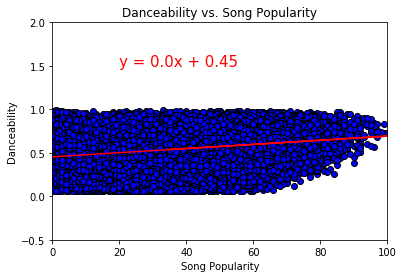

In [26]:
# Generate a scatter plot of popularity versus danceability
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter=clean_df["danceability"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Danceability")
plt.title("Danceability vs. Song Popularity")
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between popularity and danceability is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot.png")

The correlation between popularity and tempo is 0.24


Text(20, 1.5, 'y = 0.0x + 0.42')

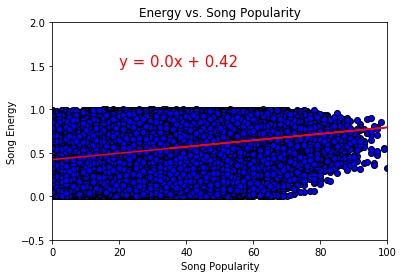

In [28]:
# Generate a scatter plot of popularity versus energy
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter1=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter1=clean_df["energy"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Energy")
plt.title("Energy vs. Song Popularity")
plt.scatter(x_axis_scatter1, y_axis_scatter1, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter1,y_axis_scatter1)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter1, y_axis_scatter1)
regress_values = x_axis_scatter1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter1,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 1.png")

The correlation between popularity and tempo is 0.08


Text(20, 150, 'y = 0.15x + 111.78')

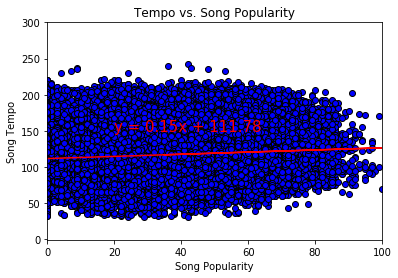

In [27]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter3=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter3=clean_df["tempo"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,300)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Tempo")
plt.title("Tempo vs. Song Popularity")
plt.scatter(x_axis_scatter3, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter3,y_axis_scatter3)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter3,regress_values,"r-")
plt.annotate(line_eq,(20,150),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 3.png")

The correlation between popularity and tempo is 0.32


Text(70, 1.8, 'y = 0.12x + -14.44')

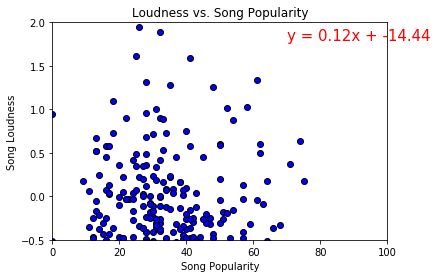

In [34]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter4=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter4=clean_df["loudness"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Loudness")
plt.title("Loudness vs. Song Popularity")
plt.scatter(x_axis_scatter4, y_axis_scatter4, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter4,y_axis_scatter4)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter4,regress_values,"r-")
plt.annotate(line_eq,(70,1.8),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 4.png")

The correlation between popularity and tempo is 0.05


Text(20, 1.8, 'y = 0.0x + 0.42')

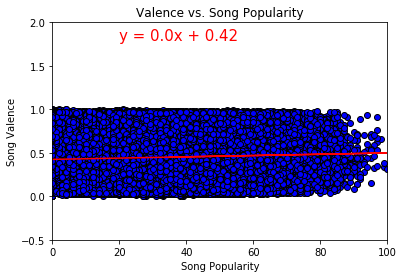

In [33]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter5=clean_df["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter5=clean_df["valence"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Valence")
plt.title("Valence vs. Song Popularity")
plt.scatter(x_axis_scatter5, y_axis_scatter5, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter5,y_axis_scatter5)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter5, y_axis_scatter5)
regress_values = x_axis_scatter5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter5,regress_values,"r-")
plt.annotate(line_eq,(20,1.8),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 5.png")